# SSS Biases


In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
from dask.distributed import Client, progress


import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

netcdf_index loaded.
Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
# use common start and end dates for all runs
tstart = exptdata.clim_tstart
tend = exptdata.clim_tend

In [3]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

In [4]:
client = Client('tcp://10.0.64.18:8786', local_dir='/local/g40/amh157')
client

Client Scheduler: tcp://10.0.64.18:8786 Dashboard: http://10.0.64.18:8787/status,Cluster Workers: 6 Cores: 6 Memory: 24.00 GB


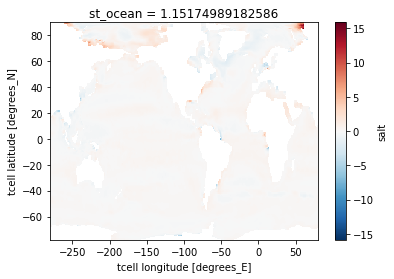

In [5]:
ekey='1deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']

surface_salt_10 = cc.get_nc_variable(expt, 'ocean.nc', 'salt',
                        chunks={'st_ocean': None}, n=n_files,
                        time_units=time_units, offset=offset).isel(st_ocean=0).sel(time=slice(tstart,tend)).mean('time')
salt_WOA13_10 = cc.get_nc_variable('woa13/10_KDS50', 'woa13_ts_??_mom10.nc', 'salt').isel(ZT=0).mean('time')
#salt_WOA13_10 = cc.get_nc_variable('woa13/10_KDS50', 'ocean_salt_salt.res.nc', 'salt').isel(ZT=0).mean('time')

salt_anom_10 = surface_salt_10 - salt_WOA13_10.values
salt_anom_10.load()

IPython.display.clear_output()

salt_anom_10.plot()

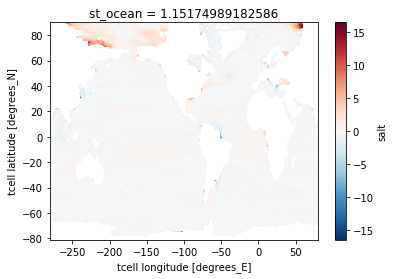

In [6]:
ekey='025deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']
surface_salt_025 = cc.get_nc_variable(expt, 'ocean.nc', 'salt',
                        chunks={'st_ocean': None}, n=n_files,
                        time_units=time_units, offset=offset).isel(st_ocean=0).sel(time=slice(tstart,tend)).mean('time')
salt_WOA13_025 = cc.get_nc_variable('woa13/025_KDS50', 'woa13_ts_??_mom025.nc', 'salt').isel(ZT=0).mean('time')
salt_anom_025 = surface_salt_025 - salt_WOA13_025.values 

salt_anom_025.load()

IPython.display.clear_output()

salt_anom_025.plot()

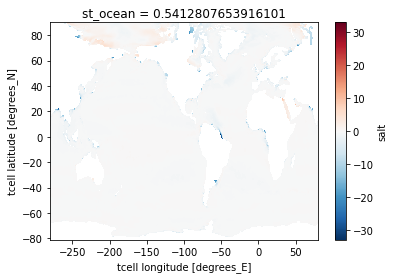

In [8]:
ekey='01deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']
surface_salt_01 = cc.get_nc_variable(expt, 'ocean.nc', 'salt',
                        chunks={'st_ocean': None}, n=n_files,
                        time_units=time_units, offset=offset).isel(st_ocean=0).sel(time=slice(tstart,tend)).mean('time')
salt_WOA13_01 = cc.get_nc_variable('woa13/01', 'woa13_ts_??_mom01.nc', 'salt').isel(ZT=0).mean('time')
salt_anom_01 = surface_salt_01 - salt_WOA13_01.values
salt_anom_01.load()
IPython.display.clear_output()

salt_anom_01.plot()

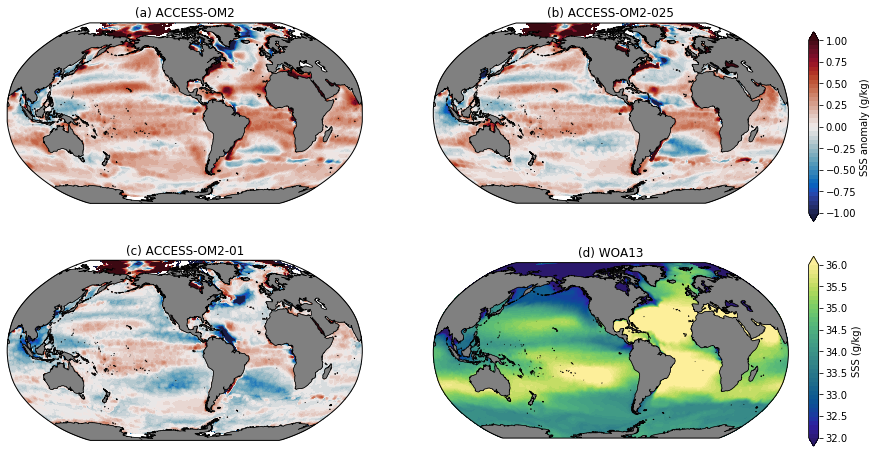

In [9]:
plt.figure(figsize=(14,8))
clev = np.arange(-1,1.01,0.05)
land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='gray',linewidth=0.5)

ax1 = plt.subplot(2,2,1,projection=ccrs.Robinson(central_longitude=-100))
ax1.coastlines(resolution='50m')
ax1.add_feature(land_50m)
p1 = salt_anom_10.plot.contourf(cmap=cm.cm.balance,levels=clev,add_colorbar=False,transform=ccrs.PlateCarree())
plt.title('(a) ACCESS-OM2')

ax2 = plt.subplot(2,2,2,projection=ccrs.Robinson(central_longitude=-100))
ax2.coastlines(resolution='50m')
ax2.add_feature(land_50m)
p1 = salt_anom_025.plot.contourf(cmap=cm.cm.balance,levels=clev,add_colorbar=False,transform=ccrs.PlateCarree())
plt.title('(b) ACCESS-OM2-025')

ax3 = plt.subplot(2,2,3,projection=ccrs.Robinson(central_longitude=-100))
ax3.coastlines(resolution='50m')
ax3.add_feature(land_50m)
p1 = salt_anom_01.plot.contourf(cmap=cm.cm.balance,levels=clev,add_colorbar=False,transform=ccrs.PlateCarree())
plt.title('(c) ACCESS-OM2-01')

ax4 = plt.subplot(2,2,4,projection=ccrs.Robinson(central_longitude=-100))
ax4.coastlines(resolution='50m')
ax4.add_feature(land_50m)
p4 = salt_WOA13_01.plot.contourf(cmap=cm.cm.haline,levels=np.arange(32,36.01,0.1),add_colorbar=False,transform=ccrs.PlateCarree())
plt.title('(d) WOA13')

ax5 = plt.axes([0.92,0.52,0.01,0.33])
cb = plt.colorbar(p1,cax=ax5,orientation='vertical')
cb.ax.set_ylabel('SSS anomaly (g/kg)')

ax6 = plt.axes([0.92,0.13,0.01,0.33])
cb = plt.colorbar(p4,cax=ax6,orientation='vertical')
cb.ax.set_ylabel('SSS (g/kg)')

savefigure('global_sss_bias')